In [66]:
# Gareth Walker, 2024

In [67]:
import sys

# where to save any image files
plotDir="../Plots/"

In [68]:
# get the correlations for all the pairs of variables


# a list of all the relevant variables
sp_var_fullset = ['pitchAtPeakIntDiff',
                  'peakIntDiff',
                  'finalGlotCl'
]

file='../Results/local_walker.csv'


from scipy import stats

# get all the possible combinations
import itertools
combinations=list(itertools.combinations(sp_var_fullset, 2))

import pandas as pd

# create a new dataframe  
df = pd.read_csv(file)
df = df.replace({"--undefined--":0})



# function for getting r and p-value
def get_corr(one,two):
    # convert dataframe into series
    new_one = df[one]
    new_two = df[two]
    
    # Spearman correlation coefficient 
    corr = stats.spearmanr(new_one,new_two).statistic
    pvalue = stats.spearmanr(new_one,new_two).pvalue
    
    if pvalue < 0.001:
        pvalue = "<.001"
    else:
        pvalue = '%.3f' % pvalue
    pvalue = pvalue.lstrip("0")
    print(one, " vs. ", two, ": ρ = %.3f" % corr, ", p = ", pvalue, sep="")

def get_corrs():
    num = len(df.index) # number of rows in dataframe, as a check
    print("n = ", num, "\n", sep='')
    for combination in combinations:
        first = combination[0]
        second = combination[1]
        get_corr(first,second)
    
get_corrs()

n = 30

pitchAtPeakIntDiff vs. peakIntDiff: ρ = 0.811, p = <.001
pitchAtPeakIntDiff vs. finalGlotCl: ρ = 0.794, p = <.001
peakIntDiff vs. finalGlotCl: ρ = 0.786, p = <.001


In [69]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [70]:
%%R

rm() # resets variables
library("caseMatch")
library('varhandle') # for resetting variables

# file containing data
df <- read.csv("../Results/local_walker.csv",
               stringsAsFactors = F,
               head = T, 
               )

# number of rows without NA, as these will be the only cases matched later
numNoNA=sum(complete.cases(df))

# which variables to exclude
dropvars <- c("token",
              "hold",
              "trail"
             )

In [71]:
%%R
# function for finding cases
findSimilar <- function(comparitor){
    out <- case.match(data=df, id.var="token", leaveout.vars=dropvars,
                      distance="euclidean", case.N=2, greedy.match="pareto",
                      match.case=comparitor,
                      number.of.matches.to.return=numNoNA-1
                     )
    # new dataframe, dropping the column showing the comparitor
    output <<- out$cases[,-2]
}

In [72]:
%%R
# a function to suppress output from functions
shut_up = function(expr) {
  # temp file
  f = file()
  # write output to that file
  sink(file = f)
  # evaluate expr in original environment
  y = eval(expr, envir = parent.frame())
  # close sink
  sink()
  # get rid of file
  close(f)
}

In [73]:
%%R
# match the exemplar hold (#1 in the paper)
hold="6033-A-1127-52"
shut_up(findSimilar(hold))
compareHold <- output

# add the exemplar case to the dataframe, with a distance of 0 (meaning identical)
compareHold[nrow(compareHold) + 1,] = c(0,hold)
# reverse the ranking to start with the exemplar, down to furthest away
compareHold <- compareHold[order(as.numeric(as.character(compareHold$distances))),]
# renumber
rownames(compareHold) <- 1:nrow(compareHold)

print(compareHold)

my_list <- list(compareHold$"unit id 2")
my_list <- lapply(my_list, toString)
my_list <- gsub(',', '', my_list)
cat(paste("\nList of cases in order of distance from comparitor:\n\n"), paste(my_list), paste("\n\n"), sep="")

write.csv(compareHold, "../Results/compareHold.csv", row.names=FALSE)

          distances      unit id 2
1                 0 6033-A-1127-52
2  27.6761711847237  5242-A-926-08
3  93.5100120163394  6179-B-736-72
4  148.762246721028  5788-B-583-08
5  159.477903393455  6274-B-136-69
6  178.070036478293  6274-A-455-46
7  318.083653470695  6348-B-492-74
8  389.070621542084  6079-A-792-21
9  422.291239665996  4666-B-573-64
10 464.237813368432  4415-B-293-70
11 519.020535474663  4580-A-624-06
12  532.49914218096 4612-A-1308-96
13 538.113019022375  5788-B-318-64
14 608.062154088588  6456-B-719-37
15 615.853147646257  0638-A-794-92
16 618.603574248686  5866-A-418-89
17 648.065727772999  5931-B-523-87
18 674.858383062924  5373-A-651-85
19 675.339732209671 5573-A-1261-34
20 845.173270710259 6100-A-1245-16
21 845.765955779577  4686-B-340-11
22 970.923823583379  4576-A-311-11
23 1030.33955176534  6785-A-519-32
24 1073.04452939716   4092-A-57-20
25 1140.54061576783  4576-B-668-34
26 1241.07673829819  4927-A-592-73
27 1423.78454475308 6625-A-1303-95
28 1684.46224432012 

In [74]:
%%R
# match the exemplar trailoff with turn transition (#2 in the paper)
trail="4074-A-695-85"
shut_up(findSimilar(trail))
compareTrail <- output

# add the exemplar case to the dataframe, with a distance of 0 (meaning identical)
compareTrail[nrow(compareTrail) + 1,] = c(0,trail)
# reverse the ranking to start with the exemplar, down to furthest away
compareTrail <- compareTrail[order(as.numeric(as.character(compareTrail$distances))),]
# renumber
rownames(compareTrail) <- 1:nrow(compareTrail)

print(compareTrail)

my_list <- list(compareTrail$"unit id 2")
my_list <- lapply(my_list, toString)
my_list <- gsub(',', '', my_list)
cat(paste("\nList of cases in order of distance from comparitor:\n\n"), paste(my_list), paste("\n\n"), sep="")

write.csv(compareTrail, "../Results/compareTrail.csv", row.names=FALSE)

          distances      unit id 2
1                 0  4074-A-695-85
2  7.94621895944907 4310-B-1272-58
3  90.4252774408684 6625-A-1303-95
4  98.4981512233352  5777-B-560-59
5    99.94734464595  4576-B-668-34
6  175.807006309812   4092-A-57-20
7  200.697263707195  4927-A-592-73
8  216.201857744677  4686-B-340-11
9  226.796989589597  6785-A-519-32
10 238.925664860374  4576-A-311-11
11 298.419802934138 6100-A-1245-16
12 331.319589472551 5573-A-1261-34
13 341.265537597761  5373-A-651-85
14 360.075027812174  0638-A-794-92
15 368.774327249193  5866-A-418-89
16 370.082666106723  6456-B-719-37
17 387.695100545725  5931-B-523-87
18 427.857148224081  5788-B-318-64
19 448.811967884876 4612-A-1308-96
20 466.112447015051  4580-A-624-06
21 512.462537011858  4415-B-293-70
22 548.631605010274  4666-B-573-64
23  585.30485939048  6079-A-792-21
24 738.188204384378  6348-B-492-74
25 984.299125006421  6274-B-136-69
26   995.2127307407  6274-A-455-46
27 1208.33088330864  5788-B-583-08
28 1534.98180448827 

In [75]:
%%R
# match the exemplar hold (#1 in the paper)
hold="6033-A-1127-52"

# downweight the pitch and loudness variables relative to the glottal
myvarweights <- c(.01,.01,1)
names(myvarweights) <- c("pitchAtPeakIntDiff","peakIntDiff","finalGlotCl")
myvarweights

shut_up(out <- case.match(data=df, id.var="token", leaveout.vars=dropvars,
                  distance="euclidean", case.N=2, greedy.match="pareto",
                  match.case=hold,
                  number.of.matches.to.return=numNoNA-1,varweights=myvarweights
                 ))
# new dataframe, dropping the column showing the comparitor
output <<- out$cases[,-2]
compareHold <- output

# add the exemplar case to the dataframe, with a distance of 0 (meaning identical)
compareHold[nrow(compareHold) + 1,] = c(0,hold)
# reverse the ranking to start with the exemplar, down to furthest away
compareHold <- compareHold[order(as.numeric(as.character(compareHold$distances))),]
# renumber
rownames(compareHold) <- 1:nrow(compareHold)

print(compareHold)

my_list <- list(compareHold$"unit id 2")
my_list <- lapply(my_list, toString)
my_list <- gsub(',', '', my_list)
cat(paste("\nList of cases in order of distance from comparitor:\n\n"), paste(hold), paste(" "), paste(my_list), paste("\n\n"), sep="")

write.csv(compareHold, "../Results/compareHoldWeighted.csv", row.names=FALSE)

             distances      unit id 2
1                    0 6033-A-1127-52
2  0.00276761711847237  5242-A-926-08
3  0.00935100120163394  6179-B-736-72
4   0.0148762246721028  5788-B-583-08
5   0.0159477903393455  6274-B-136-69
6   0.0178070036478293  6274-A-455-46
7   0.0318083653470695  6348-B-492-74
8   0.0389070621542084  6079-A-792-21
9   0.0422291239665996  4666-B-573-64
10    1.04632378133684  4415-B-293-70
11    1.05180205354747  4580-A-624-06
12     1.0531499142181 4612-A-1308-96
13    1.05371130190224  5788-B-318-64
14    1.06070621540886  6456-B-719-37
15    1.06148531476463  0638-A-794-92
16    1.06176035742487  5866-A-418-89
17     1.0647065727773  5931-B-523-87
18    1.06738583830629  5373-A-651-85
19    1.06743397322097 5573-A-1261-34
20    1.08441732707103 6100-A-1245-16
21    1.08447659557796  4686-B-340-11
22    1.09699238235834  4576-A-311-11
23    1.10293395517653  6785-A-519-32
24    1.10720445293972   4092-A-57-20
25    1.11395406157678  4576-B-668-34
26    1.1240

In [76]:
%%R
# match the exemplar trail (#2 in the paper)
trail="4074-A-695-85"

# downweight the pitch and loudness variables relative to the glottal
myvarweights <- c(.01,.01,1)
names(myvarweights) <- c("pitchAtPeakIntDiff","peakIntDiff","finalGlotCl")
myvarweights

shut_up(out <- case.match(data=df, id.var="token", leaveout.vars=dropvars,
                  distance="euclidean", case.N=2, greedy.match="pareto",
                  match.case=trail,
                  number.of.matches.to.return=numNoNA-1,varweights=myvarweights
                 ))
# new dataframe, dropping the column showing the comparitor
output <<- out$cases[,-2]
compareTrail <- output

# add the exemplar case to the dataframe, with a distance of 0 (meaning identical)
compareTrail[nrow(compareTrail) + 1,] = c(0,trail)
# reverse the ranking to start with the exemplar, down to furthest away
compareTrail <- compareTrail[order(as.numeric(as.character(compareTrail$distances))),]
# renumber
rownames(compareTrail) <- 1:nrow(compareTrail)

print(compareTrail)

my_list <- list(compareTrail$"unit id 2")
my_list <- lapply(my_list, toString)
my_list <- gsub(',', '', my_list)
cat(paste("\nList of cases in order of distance from comparitor:\n\n"), paste(trail), paste(" "), paste(my_list), paste("\n\n"), sep="")

write.csv(compareTrail, "../Results/compareTrailWeighted.csv", row.names=FALSE)

              distances      unit id 2
1                     0  4074-A-695-85
2  0.000794621895944907 4310-B-1272-58
3   0.00904252774408684 6625-A-1303-95
4   0.00984981512233352  5777-B-560-59
5     0.009994734464595  4576-B-668-34
6    0.0175807006309812   4092-A-57-20
7    0.0200697263707195  4927-A-592-73
8    0.0216201857744677  4686-B-340-11
9    0.0226796989589597  6785-A-519-32
10   0.0238925664860374  4576-A-311-11
11   0.0298419802934138 6100-A-1245-16
12   0.0331319589472551 5573-A-1261-34
13   0.0341265537597761  5373-A-651-85
14   0.0360075027812174  0638-A-794-92
15   0.0368774327249193  5866-A-418-89
16   0.0370082666106723  6456-B-719-37
17   0.0387695100545725  5931-B-523-87
18   0.0427857148224081  5788-B-318-64
19   0.0448811967884876 4612-A-1308-96
20   0.0466112447015051  4580-A-624-06
21   0.0512462537011858  4415-B-293-70
22     1.05476316050103  4666-B-573-64
23     1.05843048593905  6079-A-792-21
24     1.07371882043844  6348-B-492-74
25     1.09832991250064  

In [77]:
# save LaTeX versions of the tables

import pandas as pd 
import numpy as np

tables = ["compareHold",
          "compareTrail",
          "compareHoldWeighted",
          "compareTrailWeighted"
         ]

for t in tables:
    if t == "compareHold":
        file='../Results/compareHold.csv'
        outfile='../LaTeX/compareHold.tex'
        caption="Comparison with exemplar holding-`so' 6033-A-1127-52"
        label="tab:compHold"
    elif t == "compareTrail":
        file='../Results/compareTrail.csv'
        outfile='../LaTeX/compareTrail.tex'
        caption="Comparison with exemplar trailoff-`so' 4074-A-695-85"
        label="tab:compTrail"
    elif t == "compareHoldWeighted":
        file='../Results/compareHoldWeighted.csv'
        outfile='../LaTeX/compareHoldWeighted.tex'
        caption="Comparison with exemplar holding-`so' 6033-A-1127-52; \\vb{finalGlotCl} weight = 1, \\vb{pitchAtPeakIntDiff} and \\vb{peakIntDiff} weight = 0.5"
        label="tab:compHoldWeighted"
    elif t == "compareTrailWeighted":
        file='../Results/compareTrailWeighted.csv'
        outfile='../LaTeX/compareTrailWeighted.tex'
        caption="Comparison with exemplar trailoff-`so' 4074-A-695-85, \\vb{finalGlotCl} weight = 1, \\vb{pitchAtPeakIntDiff} and \\vb{peakIntDiff} weight = 0.5 "
        label="tab:compTrailWeighted"


    # create a new dataframe  
    sim = pd.read_csv(file)
    # add a first column containing the row number
    sim.insert(0, 'Rank', range(0, 0 + len(sim)))
    # rename columns
    sim = sim.rename(columns={'distances': 'Distance', 'unit id 2': 'Token'})
    # write LaTeX output
    latex = sim.style.hide(axis="index").format(precision=2).to_latex(position_float='centering',
                                                                      column_format='rrr',
                                                                      position="H",
                                                                      caption=caption,
                                                                      siunitx=True,
                                                                      label=label,
                                                                      hrules=True,
                                                                      )
    
    print(latex, file=open(outfile, 'w'))

In [78]:
# get details of the the closest matches to the exemplar holds and trails,
# and make some summary tables

import pandas as pd

# read in the main file containing the info on phonetic variables
df=pd.read_csv("../Results/local_walker.csv")
df = df.replace({"--undefined--":0})
#df['meanPitchDiffST'] = df['meanPitchDiffST'].astype(float)

types = ["trail", 
         "hold", 
         "trailWeighted", 
         "holdWeighted"
        ]

for t in types:

    if t == "trail":
        dataFile="compareTrail.csv"
        exemplar="4074-A-695-85"
        latex_table="../LaTeX/compareTrailFull.tex"
        caption="Distance from the exemplar trailoff-`so', shown in the first row"
        label="tab:trailcomp"
    elif t == "hold":
        dataFile="compareHold.csv"
        latex_table="../LaTeX/compareHoldFull.tex"
        exemplar="6033-A-1127-52"
        caption="Distance from the exemplar holding-`so', shown in the first row"
        label="tab:holdcomp"
    elif t == "trailWeighted":
        dataFile="compareTrailWeighted.csv"
        exemplar="4074-A-695-85"
        latex_table="../LaTeX/compareTrailWeightedFull.tex"
        caption="Distance from the exemplar trailoff-`so', shown in the first row; \\vb{pitchAtPeakIntDiff} and \\vb{peakIntDiff} weight = 0.5, \\vb{finalGlotCl} weight = 1"
        label="tab:trailcompweight"
    elif t == "holdWeighted":
        dataFile="compareHoldWeighted.csv"
        latex_table="../LaTeX/compareHoldWeightedFull.tex"
        exemplar="6033-A-1127-52"
        caption="Distance from the exemplar holding-`so', shown in the first row; \\vb{pitchAtPeakIntDiff} and \\vb{peakIntDiff} weight = 0.5, \\vb{finalGlotCl} weight = 1"
        label="tab:holdcompweight"
    
    # get details of the "so"s
    dist_df=pd.read_csv("../Results/" + dataFile)

    # make a new dataframe to store the information
    cols = ['token', 'distance', 'pitchAtPeakIntDiff', 'peakIntDiff', 'finalGlotCl', 'category']
    new_df = pd.DataFrame(columns=cols)

    # go through the dataframe of the closest cases
    for ind in dist_df.index:
        token = dist_df['unit id 2'][ind]
        distance = dist_df['distances'][ind]

        # get information from the main phon file
        d2 = df[(df['token']==token)]
        # get the duration
        pitchAtPeakIntDiff = d2.iloc[0]['pitchAtPeakIntDiff']
        peakIntDiff = d2.iloc[0]['peakIntDiff']
        finalGlotCl = d2.iloc[0]['finalGlotCl']
        hold = d2.iloc[0]['hold']
        trail = d2.iloc[0]['trail']
        if hold == 1 and trail == 0:
            hold = "hold"
        elif hold == 0 and trail == 1:
            hold = "trail"
        # add to the dataframe
        new_df.loc[len(new_df)] = [token, distance, pitchAtPeakIntDiff, peakIntDiff, finalGlotCl, hold]

    # make the glottal column an integer
    new_df['finalGlotCl'] = new_df['finalGlotCl'].astype(int)

    # add a column showing rank
    new_df.insert(0, 'Rank', range(0, 0 + len(new_df)))
    
    # print a text version
    print(new_df, "\n")
    new_df.to_csv("../Results/" + t + ".csv", index=False)
    
    # rename columns
    rename_new_df = new_df.rename(columns={'token': 'Token', 'distance': 'Distance',
                                             'pitchAtPeakIntDiff': 'pitchAtPeakIntDiff (ST)',
                                             'peakIntDiff': 'peakIntDiff (dB)',
                                            })

    latex = rename_new_df.style.hide(axis="index").format(precision=2).to_latex(position_float='centering',
                                                                      #column_format='rrr',
                                                                      position="H",
                                                                      caption=caption,
                                                                      siunitx=True,
                                                                      label=label,
                                                                      hrules=True,                                                                                 
                                                                      )
    
    print(latex, file=open(latex_table, 'w'))


    Rank           token     distance  pitchAtPeakIntDiff  peakIntDiff  \
0      0   4074-A-695-85     0.000000          -14.718102        -17.2   
1      1  4310-B-1272-58     7.946219          -12.216859        -15.9   
2      2  6625-A-1303-95    90.425277          -14.299441         -7.7   
3      3   5777-B-560-59    98.498151          -19.493890         -8.5   
4      4   4576-B-668-34    99.947345           -7.298039        -10.5   
5      5    4092-A-57-20   175.807006          -10.295772         -4.7   
6      6   4927-A-592-73   200.697264           -0.573942        -18.0   
7      7   4686-B-340-11   216.201858           -4.127453         -7.0   
8      8   6785-A-519-32   226.796990          -10.650303         -2.7   
9      9   4576-A-311-11   238.925665           -9.642113         -2.6   
10    10  6100-A-1245-16   298.419803           -7.964599         -1.3   
11    11  5573-A-1261-34   331.319589           -3.330408         -3.0   
12    12   5373-A-651-85   341.265538 

<Figure size 400x400 with 0 Axes>

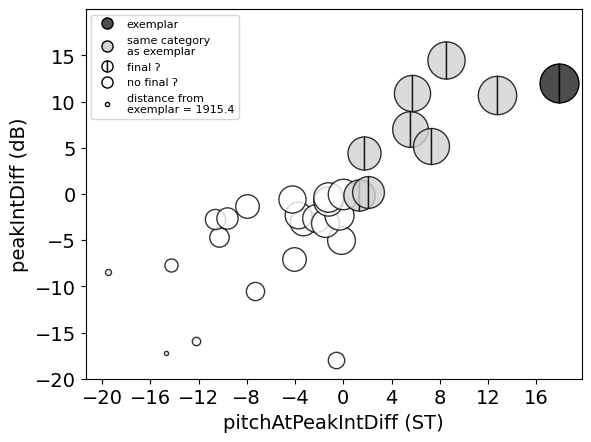

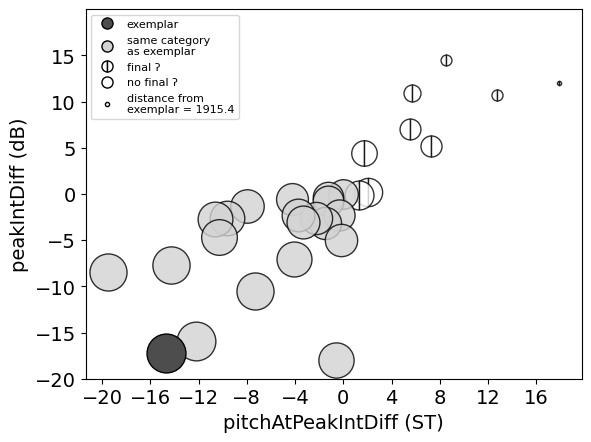

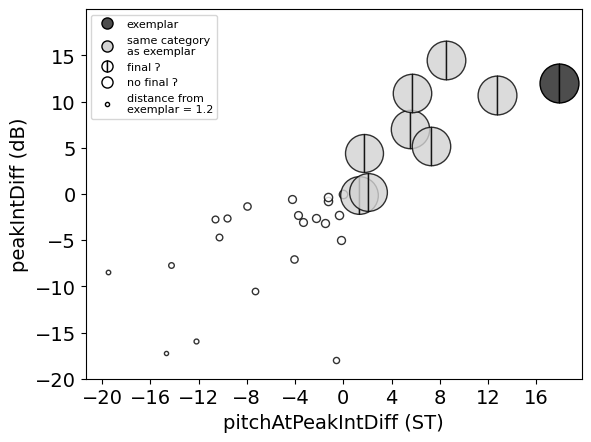

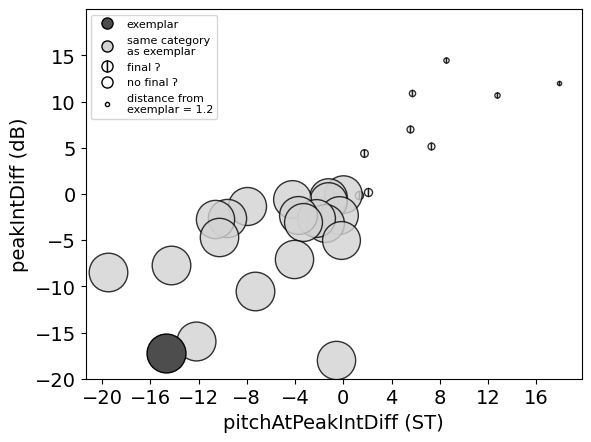

In [79]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

# details of variables
df=pd.read_csv("../Results/local_walker.csv")

plt.figure(figsize=(4,4))
plt.rcParams.update({'font.size': 14})

# make the plot
fig, ax = plt.subplots()

plots = ["compareHold", 
         "compareTrail", 
         "compareHoldWeighted", 
         "compareTrailWeighted"
        ]

for p in plots:
    
    ranking=pd.read_csv("../Results/" + p + ".csv")
    
    # get maximum distance, and scale everything else relative to that
    max_distance = ranking['distances'].max()
    
    # round maximum distance for legend
    max_distance_rnd=str(round(max_distance, 1))

    # reverse the dataframe so that the prototypical case is drawn last (= on top)
    ranking_reversed = ranking[::-1]
    
    for ind in ranking_reversed.index:
        token=ranking['unit id 2'][ind]
        distance=ranking['distances'][ind]

        # default transparency
        alpha=0.8
        
        # work out red and blue values
        rval=1-(((100/max_distance)*distance)/100)
        bval=1-rval

        # size of smallest point
        svalmin=3

        # size of largest point
        svalmax=25
        
        # work out the size
        sval=((1-(((100/max_distance)*distance)/100))*svalmax)+svalmin
    
        # get details of the case
        case = df.loc[df['token'] == token]

        # fill color for symbols
        trail = case['trail'].values[0]
        hold = case['hold'].values[0]
        if p == 'compareTrail' or p == 'compareTrailWeighted':
            if trail == 1:
                color='lightgrey'
            else:
                color='white'
        if p == 'compareHold' or p == 'compareHoldWeighted':
            if hold == 1:
                color='lightgrey'
            else:
                color='white'

        # color for exemplar
        if distance==0:
            alpha=1
            color=(0.3,0.3,0.3)

        # symbol with line for glottals
        glottal = case['finalGlotCl'].values[0]
        if glottal == 1:
            fillstyle='left'
        else:
            fillstyle='full' 

        # x and y values
        x = case['pitchAtPeakIntDiff']
        y = case['peakIntDiff']
        
        # plot the point, representing distance by size
        plt.plot(x, y, 
                 alpha=alpha, 
                 marker='o', 
                 markeredgecolor='black', 
                 markerfacecolor=color, 
                 markerfacecoloralt=color, 
                 markersize=sval, 
                 fillstyle=fillstyle
                )   
    
    # legend 
    legend_elements = [Line2D([0], [0], 
                              marker='o', 
                              markeredgecolor='black', 
                              markerfacecolor=(0.3,0.3,0.3), 
                              markersize=8, 
                              linestyle='',
                              fillstyle='full',
                              label='exemplar'
                              ),
                        Line2D([0], [0], 
                              marker='o', 
                              markeredgecolor='black', 
                              markerfacecolor='lightgrey', 
                              markersize=8, 
                              linestyle='',
                              fillstyle='full',
                              label='same category' + '\n' + 'as exemplar'
                              ),
                        Line2D([0], [0], 
                              marker='o', 
                              markeredgecolor='black', 
                              markerfacecolor='white', 
                              markerfacecoloralt='white', 
                              markersize=8, 
                              linestyle='',
                              fillstyle='left',
                              label='final \u0294'
                              ),
                        Line2D([0], [0], 
                              marker='o', 
                              markeredgecolor='black', 
                              markerfacecolor='white', 
                              markersize=8, 
                              linestyle='',
                              fillstyle='none',
                              label='no final \u0294'
                              ),
                        Line2D([0], [0], 
                              marker='o', 
                              markeredgecolor='black', 
                              markerfacecolor='white', 
                              markersize=svalmin, 
                              linestyle='',
                              fillstyle='none',
                              label='distance from' + '\n' + 'exemplar = {}'.format(max_distance_rnd)
                              ),
                       ]

    plt.legend(handles=legend_elements, loc='best', ncol=1, fontsize=8)

    # gaps between ticks
    plt.xticks(np.arange(-20, 20, step=4))
    plt.yticks(np.arange(-20, 20, step=5))

    plt.ylim([-20, 20])

    # axis labels
    plt.xlabel("pitchAtPeakIntDiff (ST)",fontsize=14)
    plt.ylabel("peakIntDiff (dB)", fontsize=14)

    # save the file
    plt.savefig(plotDir + p + "-scatter.png", format="png", dpi=300, bbox_inches='tight')
    plt.show()

In [80]:
%%bash
# make audio files

resDir=../Results
callhomeDir=~/Work/Data/Callhome

for i in "$resDir"/compare*
do
    # make a temporary directory for saving files
    tmpdir=$(basename $i | rev | cut -d. -f2 | rev)
    mkdir $tmpdir

    f=$tmpdir/tempFile # file for saving the list of files
    
    # get a list of the files
    awk -F '","' '{print $2}' $i | sed "s/\"//g" | tail -n +2 > $f

    num=1
    # go through each item in the list
    while read LINE
    do
	# get the call id
	call=$(cut -d- -f1 <<< $LINE)
	# get the caller
	caller=$(cut -d- -f2  <<< $LINE)
	if [ $caller = "A" ]
	then
	    channel=1
	elif [ $caller = "B" ]
	then
	    channel=2
	fi
	
	# get the start time, end time and duration
	startTime=$(cut -d- -f3-4  <<< $LINE | sed "s/-/\./g")
	endTime=$(grep ^$startTime "$callhomeDir"/Transcripts/TabSeparated/en_"$call".txt | cut -f2)
	dur=$(echo $endTime-$startTime | bc -l)

	sox $callhomeDir/Audio/en_$call.wav $tmpdir/$(printf %03d $num).wav trim $startTime $dur remix $channel pad 0.25 0.25

	# concatenate all the wav files in the temporary directory 
	sox $tmpdir/*wav ../Audio/Chains/$tmpdir.wav
	
	num=$((num+1))

    done < $f
    rm -rf $tmpdir
done

